In [1]:
import scipy.stats as sps
import numpy as np
import pandas as pd

norm = sps.norm(0, 1)
cauchy = sps.cauchy()
logistic = sps.logistic()
student5 = sps.t(5)
student15 = sps.t(15)

def quant(distr = norm):
    T_list = []

    for i in range(100000):
        sample = distr.rvs(251)
        R = max(sample) - min(sample)
        std = np.std(sample)
        T = R/std
        T_list.append(T)

    quantiles = []
    for q in range(1, 1000):
        quantiles.append(np.quantile(T_list, q/1000)) 

    df = pd.DataFrame(columns = ['q', 'x_q'])
    for q in range(1, 1000):
        df.loc[len(df)] = [q/1000, quantiles[q-1]]

    df.to_csv('quantiles.csv', index=False)
    
    return df, quantiles

df, quantiles = quant()
print(df)

         q       x_q
0    0.001  4.501647
1    0.002  4.550714
2    0.003  4.584541
3    0.004  4.611167
4    0.005  4.634059
..     ...       ...
994  0.995  7.193685
995  0.996  7.255053
996  0.997  7.328449
997  0.998  7.426695
998  0.999  7.575605

[999 rows x 2 columns]


0.06406391846444626


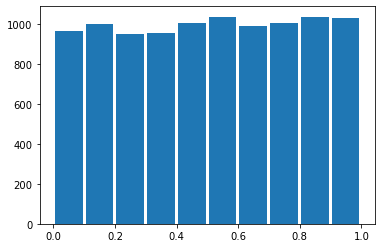

In [2]:
# p_values для критерия Дэвида-Хартли-Пирсона
import matplotlib.pyplot as plt

def pval(quantiles, distr = norm):
    pvalues = []
    pvalue1 = 0
    pvalue2 = 0
    sample = distr.rvs(251)
    for k in range(10000):
        sample = distr.rvs(251)
        R = max(sample) - min(sample)
        std = np.std(sample)
        T = R/std
        k1 = 0
        k2 = 0
        for i in range(len(quantiles)):
            if T < quantiles[i]:
                k1 += 1
            if T > quantiles[i]:
                k2 += 1
        pvalue1 = round(k1/len(quantiles), 3)
        pvalue2 = round(k2/len(quantiles), 3)
        pvalues.append(2*min(pvalue1, pvalue2))

    ks_test = sps.kstest(pvalues, 'uniform')[1]
    
    return ks_test, pvalues

ks_test, pvalues = pval(quantiles)
print(ks_test)

plt.hist(pvalues, rwidth=0.9)
plt.show()

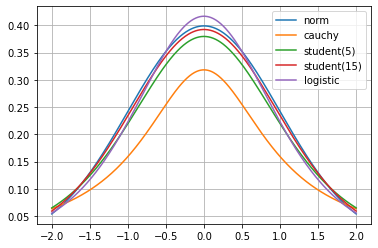

In [3]:
x = np.linspace(-2,2,500)

normal_distribution = sps.norm.pdf(x)
plt.plot(x, normal_distribution, label = 'norm')

cauchy_distribution = sps.cauchy.pdf(x)
plt.plot(x, cauchy_distribution, label = 'cauchy')

t5_distribution = sps.t(5).pdf(x)
plt.plot(x, t5_distribution, label = 'student(5)')

t15_distribution = sps.t(15).pdf(x)
plt.plot(x, t15_distribution, label = 'student(15)')

logistic_distribution = sps.logistic(0,0.6).pdf(x)
plt.plot(x, logistic_distribution, label = 'logistic')

plt.grid()
plt.legend()
plt.show()

In [4]:
alpha1 = 0.01 
alpha2 = 0.05 
alpha3 = 0.1 
def moshnost(alpha, pvalues):
    a = 0
    for p in pvalues:
        if p<alpha or p > 1-(alpha):
            a += 1   
    return a/len(pvalues)

In [5]:
#Распределение Коши
quantiles_cauchy = quant(distr = cauchy)[1]
pvalues_cauchy = pval(quantiles = quantiles_cauchy, distr = cauchy)[1]
res_cauchy = [moshnost(alpha = alpha1, pvalues = pvalues_cauchy), moshnost(alpha = alpha2, pvalues = pvalues_cauchy),  moshnost(alpha = alpha3, pvalues = pvalues_cauchy)]
print(res_cauchy)

[0.0138, 0.0916, 0.1951]


In [6]:
#Логистическое распределение
quantiles_logistic = quant(distr = logistic)[1]
pvalues_logistic = pval(quantiles = quantiles_logistic, distr = logistic)[1]
res_logistic = [moshnost(alpha = alpha1, pvalues = pvalues_logistic),
                moshnost(alpha = alpha2, pvalues = pvalues_logistic),
                moshnost(alpha = alpha3, pvalues = pvalues_logistic)]
print(res_logistic)

[0.0194, 0.1017, 0.2025]


In [7]:
#Распределение Стьюдента с 5 степенями свободы
quantiles_student5 = quant(distr = student5)[1]
pvalues_student5 = pval(quantiles = quantiles_student5, distr = student5)[1]
res_student5 = [moshnost(alpha = alpha1, pvalues = pvalues_student5),
                moshnost(alpha = alpha2, pvalues = pvalues_student5),
                moshnost(alpha = alpha3, pvalues = pvalues_student5)]
print(res_student5)

[0.0181, 0.1002, 0.1936]


In [8]:
#Распределение Стьюдента с 15 степенями свободы
quantiles_student15 = quant(distr = student15)[1]
pvalues_student15 = pval(quantiles = quantiles_student15, distr = student15)[1]
res_student15 = [moshnost(alpha = alpha1, pvalues = pvalues_student15),
                moshnost(alpha = alpha2, pvalues = pvalues_student15),
                moshnost(alpha = alpha3, pvalues = pvalues_student15)]
print(res_student15)

[0.016, 0.0968, 0.1946]


In [9]:
import os
import pandas as pd
import numpy as np

In [13]:
files = os.listdir('Котировки')
files.remove('US1.NFLX_150101_220101.csv')
files.remove('US1.NKE_150101_220101.csv')
files.remove('US1.TSLA_150101_220101.csv')
files.remove('US1.MCD_disappeared_874557_150101_220101.csv')
files.remove('US1.AAPL_150101_220101.csv')
files.remove('US1.NVDA_150101_220101.csv')
files

['US1.ADBE_150101_220101.csv',
 'US1.AMZN_150101_220101.csv',
 'US1.CSCO_150101_220101.csv',
 'US1.DIS_150101_220101.csv',
 'US1.INTC_150101_220101.csv',
 'US1.JNJ_150101_220101.csv',
 'US1.KO_150101_220101.csv',
 'US1.MSFT_150101_220101.csv',
 'US1.PEP_150101_220101.csv',
 'US1.PFE_150101_220101.csv',
 'US1.PG_150101_220101.csv',
 'US1.PM_150101_220101.csv']

In [15]:
def pval_df(sample, quantiles=quantiles):
    R = max(sample) - min(sample)
    std = np.std(sample)
    T = R/std
    k1 = 0
    k2 = 0
    for i in range(len(quantiles)):
        if T < quantiles[i]:
            k1 += 1
        if T > quantiles[i]:
            k2 += 1
        pvalue1 = round(k1/len(quantiles), 3)
        pvalue2 = round(k2/len(quantiles), 3)
    return 2*min(pvalue1, pvalue2)

df_log_return = pd.DataFrame()
columns = []
for file_name in files:
    temp_df = pd.read_csv(f'Котировки\{file_name}')
    columns.append(temp_df['<TICKER>'][0])
    log_return = temp_df['<CLOSE>'].apply(np.log).diff()[1:]
    df_log_return = df_log_return.assign(new=log_return)
    df_log_return.columns = columns
m1, m2 = df_log_return.max().max(), df_log_return.min().min()
_, quantiles = quant()
df_NVDA = pd.read_csv(r'Котировки\US1.NVDA_150101_220101.csv')
df_log_return['<DATE>'] = df_NVDA['<DATE>'].apply(str).str.slice(0, 4)

df_result = pd.DataFrame(columns=['Ticker', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
for d in df_log_return.columns[:-1]:
    output = [d]
    for y in ['2015', '2016', '2017', '2018', '2019', '2020', '2021']:
        output.append(pval_df(df_log_return[df_log_return['<DATE>'] == y][d].to_numpy()))
    df_result.loc[len(df_result)] = output
df_result = df_result.set_index(['Ticker'])
df_result.to_csv('1.csv')
df_result

,2015,2016,2017,2018,2019,2020,2021
Ticker,,,,,,,
US1.ADBE,0.090,0.000,0.000,0.000,0.106,0.000,0.000
US1.AMZN,0.000,0.000,0.000,0.000,0.006,0.092,0.000
US1.CSCO,0.000,0.000,0.000,0.062,0.000,0.000,0.000
US1.DIS,0.000,0.000,0.000,0.000,0.000,0.000,0.000
US1.INTC,0.008,0.000,0.000,0.000,0.000,0.000,0.000
US1.JNJ,0.000,0.000,0.000,0.000,0.000,0.000,0.030
US1.KO,0.140,0.000,0.034,0.008,0.000,0.002,0.054
US1.MSFT,0.000,0.000,0.000,0.008,0.064,0.000,0.468
US1.PEP,0.000,0.000,0.432,0.008,0.002,0.000,0.132


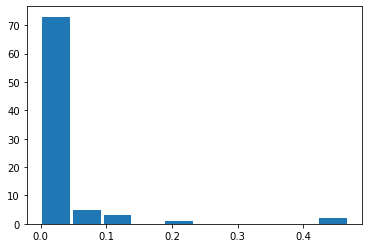

In [16]:
p_values_real = df_result.to_numpy().reshape((1, 14*6))[0].tolist()
plt.hist(p_values_real, rwidth=0.9)
plt.show()

In [17]:
alpha1 = 0.01
alpha2 = 0.05
alpha3 = 0.1

print(1 - moshnost(alpha1, p_values_real))
print(1 - moshnost(alpha2, p_values_real))
print(1 - moshnost(alpha3, p_values_real))

0.1785714285714286
0.13095238095238093
0.0714285714285714


In [18]:
alpha1 = 0.01
alpha2 = 0.05
alpha3 = 0.1

moshnosti = pd.DataFrame(columns=['TIcker', 'alpha=0.01', 'alpha=0.05', 'alpha=0.1'])
for t in df_result.index:
    output = [t]
    for a in [alpha1, alpha2, alpha3]:
        output.append(1 - moshnost(a, df_result.loc[t]))
    moshnosti.loc[len(moshnosti)] = output
moshnosti.to_csv('Мощности по компаниям.csv')
moshnosti

,TIcker,alpha=0.01,alpha=0.05,alpha=0.1
0,US1.ADBE,0.285714,0.285714,0.142857
1,US1.AMZN,0.142857,0.142857,0.000000
2,US1.CSCO,0.142857,0.142857,0.000000
3,US1.DIS,0.000000,0.000000,0.000000
4,US1.INTC,0.000000,0.000000,0.000000
5,US1.JNJ,0.142857,0.000000,0.000000
6,US1.KO,0.428571,0.285714,0.142857
7,US1.MSFT,0.285714,0.285714,0.142857
8,US1.PEP,0.285714,0.285714,0.285714
9,US1.PFE,0.285714,0.142857,0.142857


In [19]:
sf = df_result.mean(axis=1).round(3)
res = pd.DataFrame({'Ticker':sf.index, 'p-value':sf.values})
res.to_csv('3.csv')
res

,Ticker,p-value
0,US1.ADBE,0.028
1,US1.AMZN,0.014
2,US1.CSCO,0.009
3,US1.DIS,0.000
4,US1.INTC,0.001
5,US1.JNJ,0.004
6,US1.KO,0.034
7,US1.MSFT,0.077
8,US1.PEP,0.082
9,US1.PFE,0.031


In [20]:
sf = df_result.mean(axis=0).round(3)
res = pd.DataFrame({'Year':sf.index, 'p-value':sf.values})
res.to_csv('4.csv')
res

,Year,p-value
0,2015,0.038
1,2016,0.001
2,2017,0.040
3,2018,0.007
4,2019,0.015
5,2020,0.008
6,2021,0.057


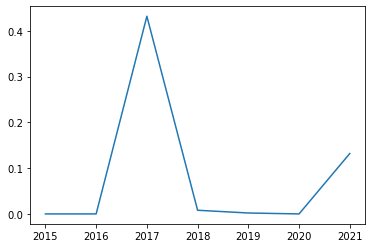

In [21]:
df_result.loc['US1.PEP'].plot()
plt.show()

##### Индекс S&P 500

In [29]:
index_name = os.listdir('Индекс')[0]
temp_df = pd.read_csv(f'Индекс\{index_name}', sep=';')
temp_df.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ETF.IVV,D,20150102,0,207.84,208.3200,205.77,206.73,2719113
1,ETF.IVV,D,20150105,0,205.62,205.7900,202.76,203.12,6147359
2,ETF.IVV,D,20150106,0,203.51,204.1200,200.25,201.27,7140971
3,ETF.IVV,D,20150107,0,202.86,204.1400,202.30,203.76,3130793
4,ETF.IVV,D,20150108,0,205.49,207.5899,205.43,207.40,4065346


In [30]:
ticker = temp_df['<TICKER>'][0]
log_return = temp_df['<CLOSE>'].apply(np.log).diff()[1:]
log_return

1      -0.017617
2      -0.009150
3       0.012296
4       0.017706
5      -0.008474
          ...   
1753    0.013778
1754   -0.000772
1755    0.001210
1756   -0.002651
1757   -0.002428
Name: <CLOSE>, Length: 1757, dtype: float64

In [31]:
log_df = pd.DataFrame(log_return.to_numpy(), columns=[ticker])
log_df['<DATE>'] = temp_df['<DATE>'].apply(str).str.slice(0, 4)
log_df

,ETF.IVV,<DATE>
0,-0.017617,2015
1,-0.009150,2015
2,0.012296,2015
3,0.017706,2015
4,-0.008474,2015
...,...,...
1752,0.013778,2021
1753,-0.000772,2021
1754,0.001210,2021
1755,-0.002651,2021


In [35]:
_, quantiles = quant()
output = [ticker]
result = pd.DataFrame(columns=['<TICKER>', '2015', '2016', '2017', '2018', '2019', '2020', '2021'])
for y in ['2015', '2016', '2017', '2018', '2019', '2020', '2021']:
    output.append(pval_df(log_df[log_df['<DATE>'] == y][ticker].to_numpy()))
result.loc[0] = output
result = result.set_index(['<TICKER>'])
result

,2015,2016,2017,2018,2019,2020,2021
<TICKER>,,,,,,,
ETF.IVV,0.0,0.008,0.004,0.0,0.0,0.0,0.078


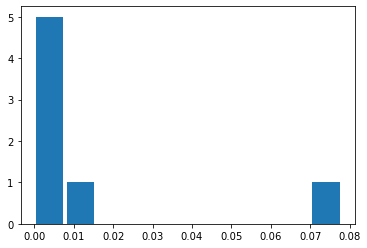

In [36]:
plt.hist(result.to_numpy()[0], rwidth=0.9)
plt.show()